In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data loading

In [157]:
data = pd.read_csv('Retail_Transactions_2000.csv')

In [158]:
data.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123


In [159]:
data.size

22000

In [160]:
data.shape

(2000, 11)

In [161]:
data.columns

Index(['TransactionID', 'CustomerID', 'Gender', 'Age', 'City',
       'ProductCategory', 'Quantity', 'Price', 'PurchaseDate', 'PaymentMode',
       'TotalAmount'],
      dtype='object')

In [162]:
data.isnull().sum()

TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
dtype: int64

In [163]:
data.duplicated().sum()

np.int64(0)

In [164]:
print(data['Gender'].unique())
print(data['City'].unique())

['Female' 'Other' 'Male']
['Bengaluru' 'Pune' 'Hyderabad' 'Chennai' 'Delhi' 'Jaipur' 'Lucknow'
 'Ahmedabad' 'Kolkata' 'Mumbai']


In [165]:
invalid_age = (data['Age'] <= 0).sum()
print("Inconsistent Age values:", invalid_age)

Inconsistent Age values: 0


In [166]:
invalid_price = (data['Price'] <= 0).sum()
print("Inconsistent Price values:", invalid_price)

Inconsistent Price values: 0


In [167]:
invalid_quantity = (data['Quantity']<=0).sum()
print("Inconsistent Quantity values:",invalid_quantity)

Inconsistent Quantity values: 0


In [168]:
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'], errors='coerce')

Handling Missing Data

In [169]:
for col in ['Age', 'Quantity', 'Price','TotalAmount']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = ((data[col] < lower) | (data[col] > upper)).sum()
    print(f"{col}: {outliers} outliers")

Age: 0 outliers
Quantity: 0 outliers
Price: 0 outliers
TotalAmount: 26 outliers


In [170]:
data['Age'].fillna(data['Age'].median()) 

0       33
1       20
2       47
3       21
4       41
        ..
1995    44
1996    53
1997    45
1998    43
1999    33
Name: Age, Length: 2000, dtype: int64

Feature Engineering

In [171]:
data['Gender'].value_counts()

Gender
Male      673
Female    664
Other     663
Name: count, dtype: int64

In [172]:
data['Year'] = data['PurchaseDate'].dt.year
data['Month'] = data['PurchaseDate'].dt.month_name()
data['Day'] = data['PurchaseDate'].dt.day_name()


In [173]:
data.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Year,Month,Day
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437,2023,March,Wednesday
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255,2023,January,Sunday
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111,2023,April,Tuesday
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730,2023,August,Wednesday
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123,2023,September,Saturday


In [174]:
data.dtypes

TransactionID              object
CustomerID                 object
Gender                     object
Age                         int64
City                       object
ProductCategory            object
Quantity                    int64
Price                       int64
PurchaseDate       datetime64[ns]
PaymentMode                object
TotalAmount                 int64
Year                        int32
Month                      object
Day                        object
dtype: object

In [175]:
bins = [0, 18, 25, 40, 60, 120]  
labels = ['<18', '18-25', '26-40', '41-60', '60+']

data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)


In [178]:
data.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Year,Month,Day,AgeGroup
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437,2023,March,Wednesday,26-40
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255,2023,January,Sunday,18-25
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111,2023,April,Tuesday,41-60
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730,2023,August,Wednesday,18-25
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123,2023,September,Saturday,41-60


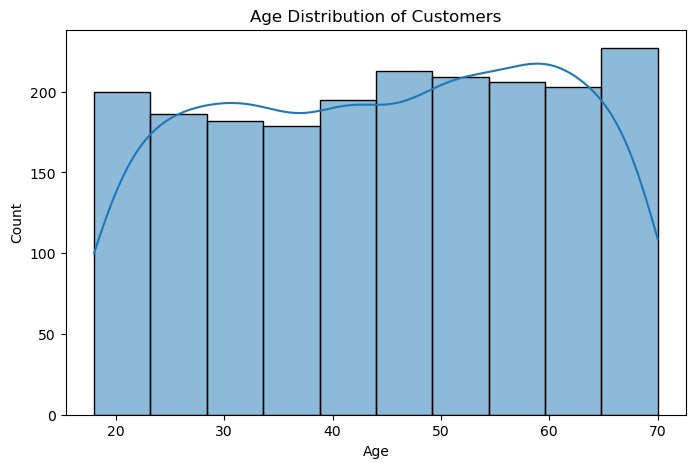

In [176]:
plt.figure(figsize=(8,5))
sns.histplot(data['Age'], bins=10, kde=True)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


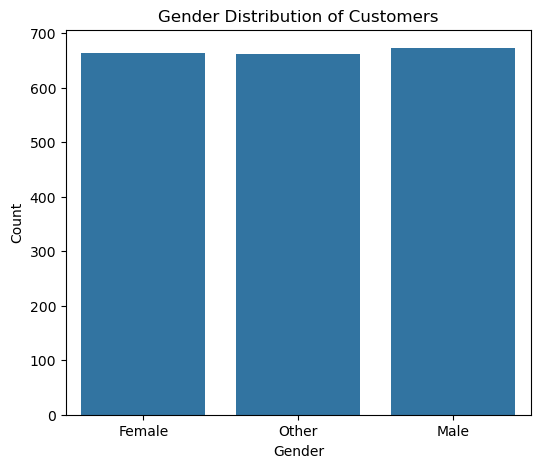

In [182]:
plt.figure(figsize=(6,5))
sns.countplot(x='Gender', data=data)
plt.title("Gender Distribution of Customers")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


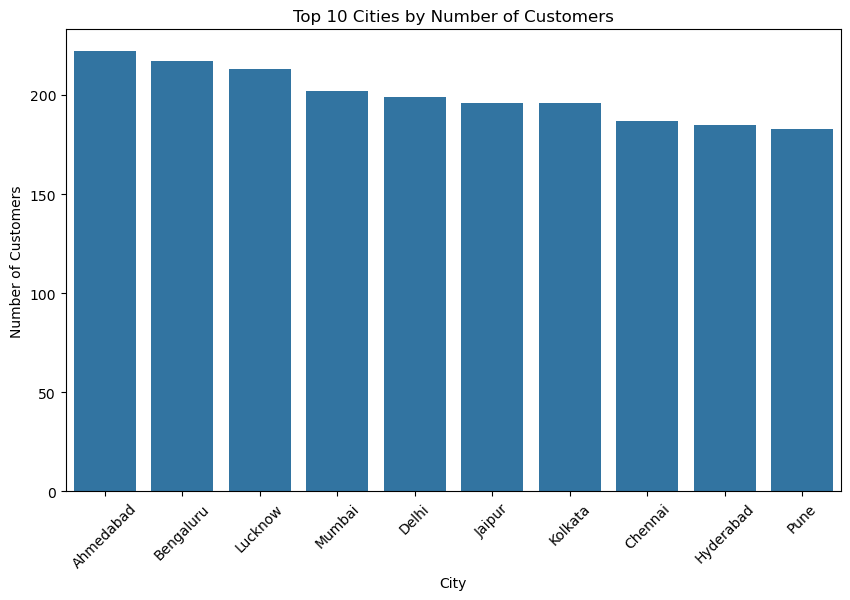

In [183]:
top_cities = data['City'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title("Top 10 Cities by Number of Customers")
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

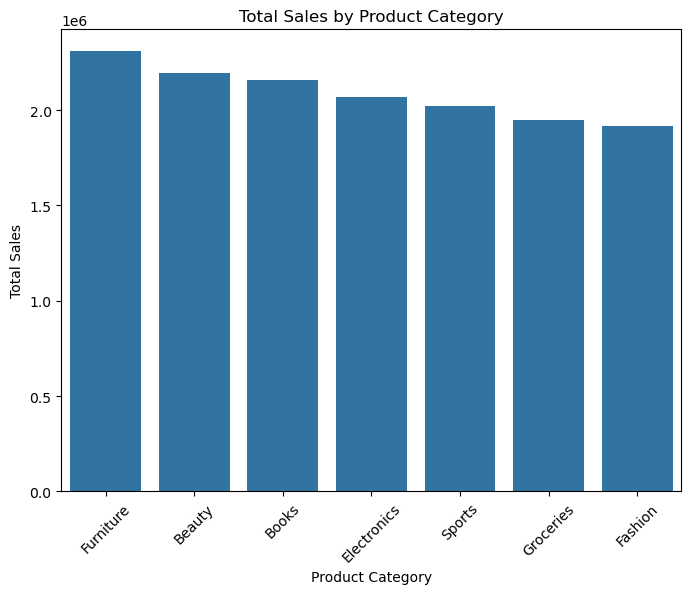

In [184]:
plt.figure(figsize=(8,6))
category_sales = data.groupby('ProductCategory')['TotalAmount'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_10492\187853686.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_sales['YearMonth'] = pd.to_datetime(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str))


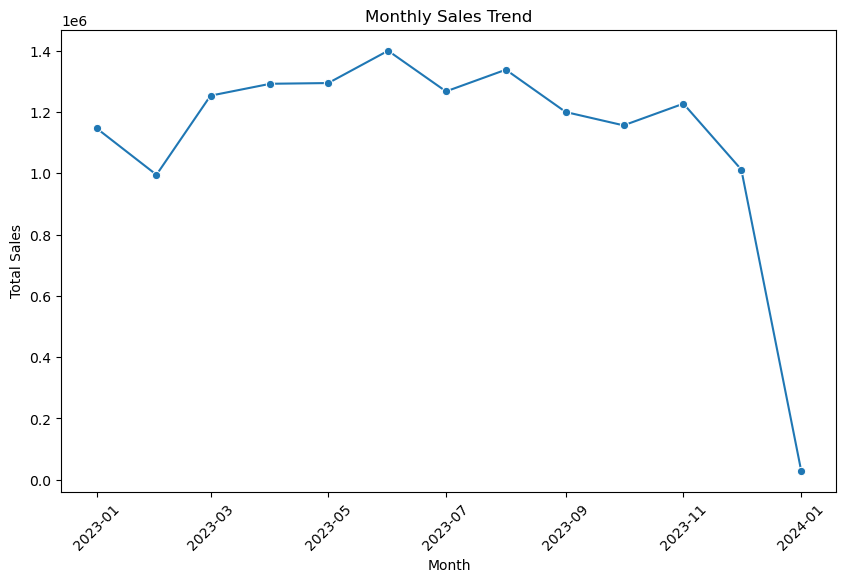

In [185]:
# Ensure PurchaseDate is in datetime format
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])

monthly_sales = data.groupby(['Year','Month'])['TotalAmount'].sum().reset_index()
monthly_sales['YearMonth'] = pd.to_datetime(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str))

plt.figure(figsize=(10,6))
sns.lineplot(x='YearMonth', y='TotalAmount', data=monthly_sales, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


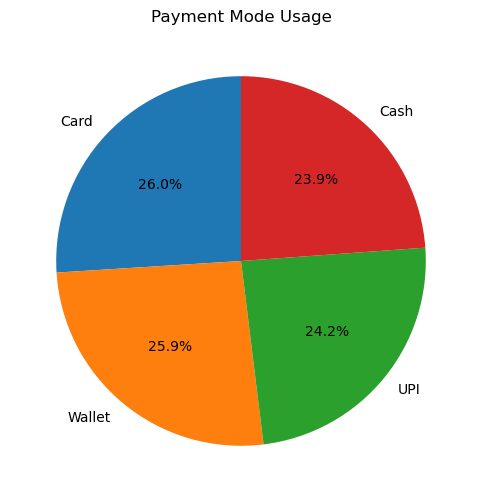

In [186]:
payment_mode = data['PaymentMode'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(payment_mode.values, labels=payment_mode.index, autopct='%1.1f%%', startangle=90)
plt.title("Payment Mode Usage")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_10492\1755795145.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spend = data.groupby('AgeGroup')['TotalAmount'].mean()


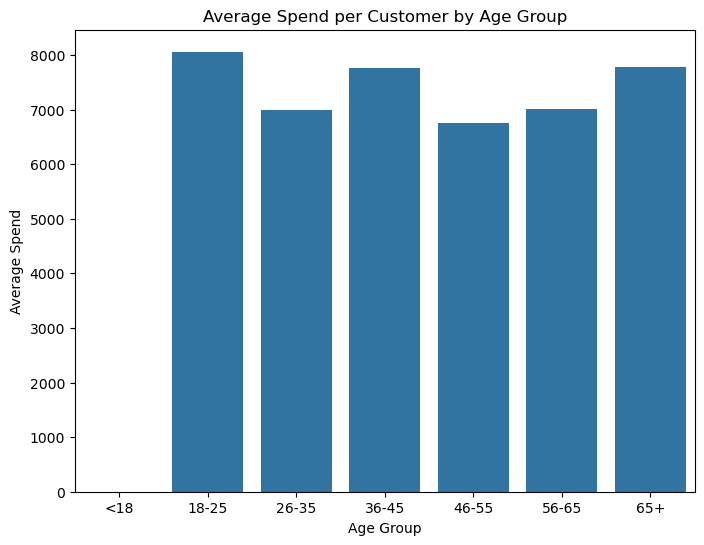

In [188]:
age_spend = data.groupby('AgeGroup')['TotalAmount'].mean()

plt.figure(figsize=(8,6))
sns.barplot(x=age_spend.index, y=age_spend.values)
plt.title("Average Spend per Customer by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Spend")
plt.show()


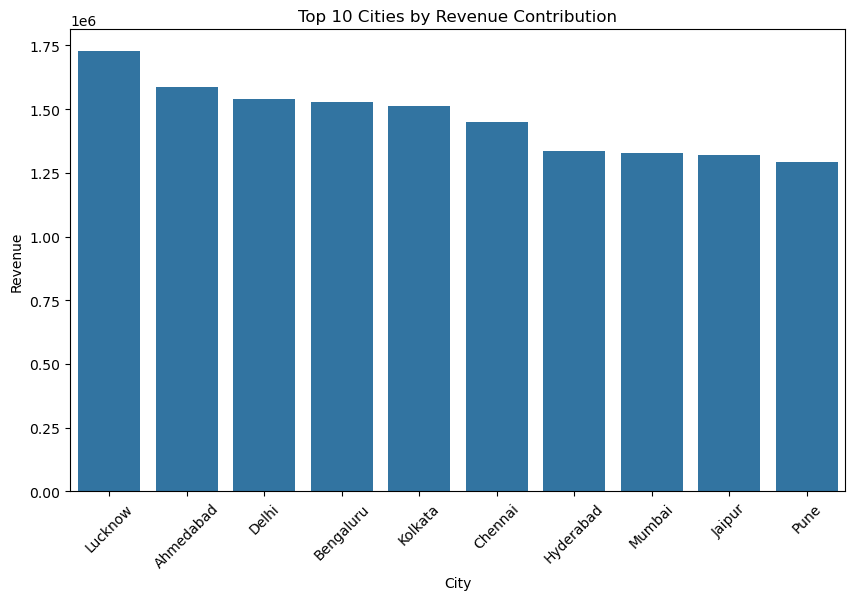

In [189]:
city_revenue = data.groupby('City')['TotalAmount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=city_revenue.index, y=city_revenue.values)
plt.title("Top 10 Cities by Revenue Contribution")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


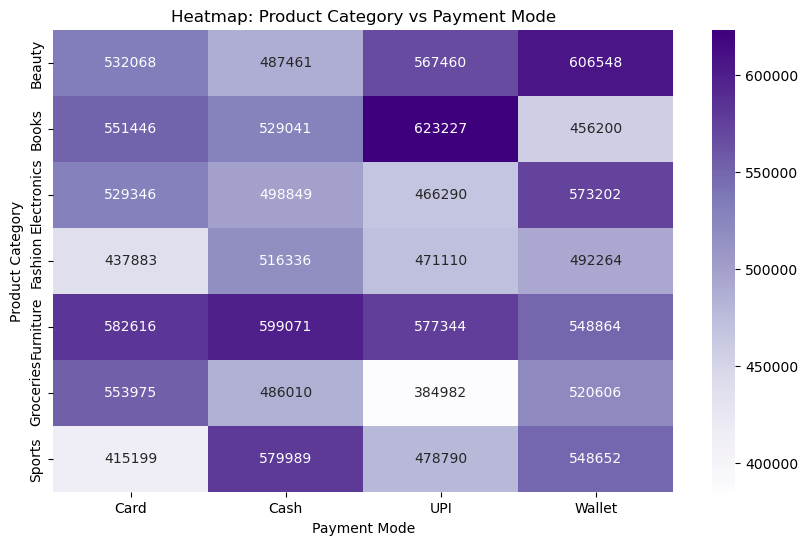

In [195]:
heatmap_data = data.pivot_table(values='TotalAmount',
                                index='ProductCategory',
                                columns='PaymentMode',
                                aggfunc='sum',
                                fill_value=0)

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Purples")
plt.title("Heatmap: Product Category vs Payment Mode")
plt.xlabel("Payment Mode")
plt.ylabel("Product Category")
plt.show()


In [196]:
data.columns

Index(['TransactionID', 'CustomerID', 'Gender', 'Age', 'City',
       'ProductCategory', 'Quantity', 'Price', 'PurchaseDate', 'PaymentMode',
       'TotalAmount', 'Year', 'Month', 'Day', 'AgeGroup'],
      dtype='object')